# Tutorial 5: Neural Network and Pytorch Dataset

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE_pytorch5_2024Fall.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE_pytorch5_2024Fall.ipynb)       
**Author:** Kaikai Liu

## Install Pytorch

Pytorch is already installed in Colab. If you are installing the pytorch in your local machine, follow the tutorials here: from https://pytorch.org/get-started/locally/. You can check our pytorch installation tutorials for Mac/Windows/Linux/HPC here: https://deepdatamininglearning.readthedocs.io/

Click "Connect" to connect to a Colab VM instance. In Runtime->Change Runtime type to select CPU/TPU/GPU.

In [ ]:
!pip3 install torch torchvision

If the installed version of PyTorch is lower than required, uninstall it and reinstall again by running the following commands:

!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

## Check PyTorch Environment

Pytorch is very similar to the `numpy` package. Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

In [ ]:
!python -V

Python 3.10.12


In [ ]:
!nvidia-smi #check GPU

Sat Aug 10 20:33:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.3.1+cu121


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6778, 0.7837, 0.6664],
        [0.6301, 0.9998, 0.7409],
        [0.5495, 0.5978, 0.6948],
        [0.2877, 0.6407, 0.9320],
        [0.7372, 0.6757, 0.0932]])


In [ ]:
import torchvision
print(torchvision.__version__)

0.18.1+cu121


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [ ]:
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print("Device name: ", torch.cuda.get_device_name(0))
    print("Device properties:", torch.cuda.get_device_properties(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Device name:  Tesla T4
Device properties: _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.version.cuda

'12.1'

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
torch.backends.cudnn.version()

8906

In [ ]:
!echo $LD_LIBRARY_PATH

/usr/lib64-nvidia


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
torch.manual_seed(42) # Setting the seed

## Load Google Drive Folder for Colab

In Colab, add the following to load google drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
filename = os.path.join("/content/gdrive/My Drive/data", filename)

Check the following tutorial regarding the external data for Colab: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd

## Working with Pytorch FashionMNIST Data

ref: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

PyTorch has two [primitives to work with
data](https://pytorch.org/docs/stable/data.html):
`torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. `Dataset`
stores the samples and their corresponding labels, and `DataLoader`
wraps an iterable around the `Dataset`.

PyTorch offers domain-specific libraries such as
[TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and
[TorchAudio](https://pytorch.org/audio/stable/index.html), all of which
include datasets. For this tutorial, we will be using a TorchVision
dataset.

The `torchvision.datasets` module contains `Dataset` objects for many
real-world vision data like CIFAR, COCO ([full list
here](https://pytorch.org/vision/stable/datasets.html)).

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

### FashionMNIST

In this
tutorial, we use the FashionMNIST dataset. Every TorchVision `Dataset`
includes two arguments: `transform` and `target_transform` to modify the
samples and labels respectively.

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:06<00:00, 4001362.11it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 216526.07it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3988568.26it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20312584.19it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



All TorchVision datasets have two parameters -transform to modify the features and target_transform to modify the labels - that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.

ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]. The default option target_transform=None

The number of images for each category in the training set and the testing set is 6,000 and 1,000, respectively. Since there are 10 categories, the numbers of examples in the training set and the test set are 60,000 and 10,000, respectively.

In [ ]:
len(training_data), len(test_data)

(60000, 10000)

We can access any example by indexing into the dataset using square brackets []. In the following code, we access the image and label corresponding to the first example.

In [ ]:
feature, label = training_data[0]

the variable feature corresponds to an image with a height and width of 28 pixels. PyTorch automatically scales it into a tensor with each pixel value between 0 and 1. It is stored in a 3D Tensor. Its first dimension is the number of channels. Since the data set is a grayscale image, the number of channels is 1. When we encounter color, images, we'll have 3 channels for red, green, and blue. To keep things simple, we will record the shape of the image with the height and width of and h and w pixels, respectively, as hxw
 or (h, w).

In [ ]:
feature.shape, feature.dtype

(torch.Size([1, 28, 28]), torch.float32)

The label of each image is represented as a scalar in PyTorch. Its type is a 64-bit integer.

In [ ]:
label, type(label)

(9, int)

There are 10 categories in Fashion-MNIST: t-shirt, trousers, pullover, dress, coat, sandal, shirt, sneaker, bag and ankle boot. The following function can convert a numeric label into a corresponding text label.

In [ ]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [ ]:
import matplotlib.pyplot as plt
def show_fashion_mnist(images, labels):
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)

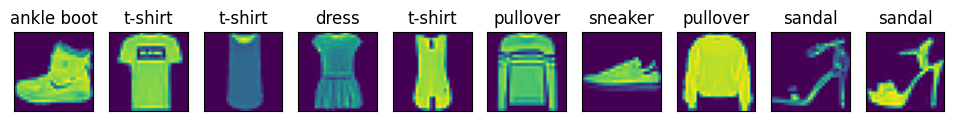

In [ ]:
X=[]
y=[]
for idx, data in enumerate(training_data):
    if(idx>=0 and idx<10):
        X.append(data[0])
        y.append(data[1])
    if (idx>=10):
        break
# X, y = mnist_train[0:9]
show_fashion_mnist(X, get_fashion_mnist_labels(y))

### Pytorch DataLoader

We pass the `Dataset` as an argument to `DataLoader`. This wraps an
iterable over our dataset, and supports automatic batching, sampling,
shuffling and multiprocess data loading. Here we define a batch size of
64, i.e. each element in the dataloader iterable will return a batch of
64 features and labels.


In [ ]:
import sys
batch_size = 64


if sys.platform.startswith('win'):
    # set 0 for windows
    # 0 means no additional processes are needed to speed up the reading of data
    num_workers = 0
else:
    num_workers = 2

# Create data loaders, Option1
#train_dataloader = DataLoader(training_data, batch_size=batch_size)
#test_dataloader = DataLoader(test_data, batch_size=batch_size)

#Option2, add shuffle and num_workers
train_dataloader = DataLoader(training_data, batch_size, shuffle=True, num_workers=num_workers)
test_dataloader = DataLoader(test_data, batch_size, shuffle=False, num_workers=num_workers)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


Check the time it takes to read the training data

In [ ]:
import time
start = time.time()
for X, y in train_dataloader:
    continue
'%.2f sec' % (time.time() - start)

'7.53 sec'

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Shape of train_features [N, C, H, W]: {train_features.shape}')
print(f'train_labels shape: {train_labels.shape}')

Shape of train_features [N, C, H, W]: torch.Size([64, 1, 28, 28])
train_labels shape: torch.Size([64])


In [ ]:
image = train_features[0].squeeze() #get the first image in the batch, remove channel
label = train_labels[0]

In [ ]:
label

tensor(8)

In [ ]:
image.shape

torch.Size([28, 28])

In [ ]:
labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

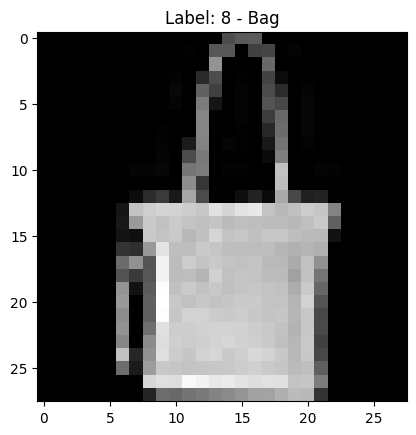

Labels batch shape: torch.Size([64])


In [ ]:
plt.title(f"Label: {label} - {labels_map[label.item()]}")
plt.imshow(image, cmap="gray")
plt.show()
print(f"Labels batch shape: {train_labels.size()}")

### Neural Network

To define a neural network in PyTorch, we create a class that inherits
from
[nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html).
We define the layers of the network in the `__init__` function and
specify how data will pass through the network in the `forward`
function. To accelerate operations in the neural network, we move it to
the GPU or MPS if available.

In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To train a model, we need a [loss
function](https://pytorch.org/docs/stable/nn.html#loss-functions) and an
[optimizer](https://pytorch.org/docs/stable/optim.html).


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In a single training loop, the model makes predictions on the training
dataset (fed to it in batches), and backpropagates the prediction error
to adjust the model\'s parameters.


In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    print("Dataset size:", size)
    num_batches = len(dataloader)
    print("Num batches:", num_batches)
    model.train()
    running_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    running_loss = running_loss / num_batches #average loss for each batch
    return running_loss

We also check the model\'s performance against the test dataset to
ensure it is learning.


In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

The training process is conducted over several iterations (*epochs*).
During each epoch, the model learns parameters to make better
predictions. We print the model\'s accuracy and loss at each epoch;
we\'d like to see the accuracy increase and the loss decrease with every
epoch.


In [ ]:
epochs = 5
train_losses, test_losses = [], []
corrects = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    running_loss = train(train_dataloader, model, loss_fn, optimizer)
    train_losses.append(running_loss)
    test_loss, correct = test(test_dataloader, model, loss_fn)
    test_losses.append(test_loss)
    corrects.append(correct)
    print("Epoch: {}/{}.. ".format(t+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(correct))
print("Done!")

Epoch 1
-------------------------------
Dataset size: 60000
Num batches: 938
loss: 2.308764  [   64/60000]
loss: 2.292500  [ 6464/60000]
loss: 2.273389  [12864/60000]
loss: 2.265841  [19264/60000]
loss: 2.255290  [25664/60000]
loss: 2.237386  [32064/60000]
loss: 2.218704  [38464/60000]
loss: 2.214656  [44864/60000]
loss: 2.168449  [51264/60000]
loss: 2.173978  [57664/60000]
Test Error: 
 Accuracy: 44.8%, Avg loss: 2.152170 

Epoch: 1/5..  Training Loss: 2.235..  Test Loss: 2.152..  Test Accuracy: 0.448
Epoch 2
-------------------------------
Dataset size: 60000
Num batches: 938
loss: 2.129592  [   64/60000]
loss: 2.112511  [ 6464/60000]
loss: 2.098142  [12864/60000]
loss: 2.089462  [19264/60000]
loss: 2.048637  [25664/60000]
loss: 2.029439  [32064/60000]
loss: 2.016063  [38464/60000]
loss: 1.967392  [44864/60000]
loss: 1.936635  [51264/60000]
loss: 1.887856  [57664/60000]
Test Error: 
 Accuracy: 53.1%, Avg loss: 1.867906 

Epoch: 2/5..  Training Loss: 2.022..  Test Loss: 1.868..  Test 

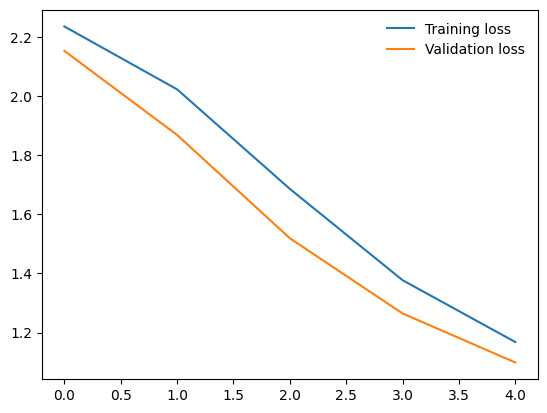

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

A common way to save a model is to serialize the internal state
dictionary (containing the model parameters).

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


The process for loading a model includes re-creating the model structure
and loading the state dictionary into it.

In [ ]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## Loading Custom Data

In [24]:
import torch

In [11]:
%%shell
echo "Getting Training Images for the fashion MNIST..."
wget "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz" --no-check-certificate
echo "Training Data Successfully fetched!"

echo "Getting Training Labels for the fashion MNIST..."
wget "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz" --no-check-certificate
echo "Training Labels Successfully fetched!"

echo "Getting Test Images for the fashion MNIST..."
wget "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz" --no-check-certificate
echo "Training Data Successfully fetched!"

echo "Getting Test Labels for the fashion MNIST..."
wget "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz" --no-check-certificate
echo "Training Data Successfully fetched!"

echo "Fashion MNIST Dataset Successfully fetched!!"

Getting Training Images for the fashion MNIST...
--2024-08-12 23:28:11--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.171.108, 52.219.140.22, 3.5.134.194, ...
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.171.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  10.4MB/s    in 2.4s    

2024-08-12 23:28:13 (10.4 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

Training Data Successfully fetched!
Getting Training Labels for the fashion MNIST...
--2024-08-12 23:28:13--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mn

In [12]:
%%shell
echo "Starting to unzip the fetched files..."
gunzip train-images-idx3-ubyte.gz
gunzip train-labels-idx1-ubyte.gz
gunzip t10k-images-idx3-ubyte.gz
gunzip t10k-labels-idx1-ubyte.gz
echo "Fetched files unzipped successfully!!"

Starting to unzip the fetched files...
Fetched files unzipped successfully!!


In [14]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7907 sha256=eb37f639a2b6752fb0a717705963e3349f7e6a1fd13613ff421e66ee737041a8
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [15]:
#read everything from the decompressed files as numpy arrays
import idx2numpy
import numpy as np
file = 'train-images-idx3-ubyte'
arr = idx2numpy.convert_from_file(file)
# arr is now a np.ndarray type of object of shape 60000, 28, 28

In [16]:
arr.shape

(60000, 28, 28)

In [22]:
train_imgs = arr

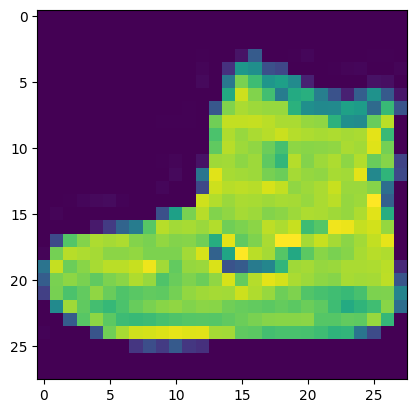

In [17]:
import matplotlib.pyplot as plt
plt.imshow(arr[0])

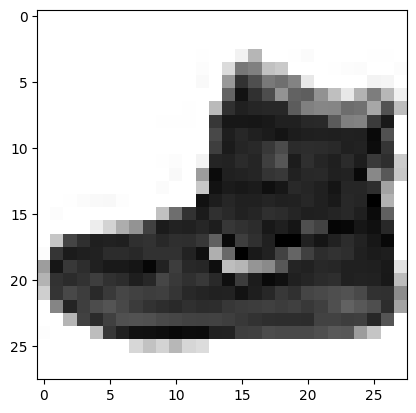

In [18]:
plt.imshow(arr[0], cmap=plt.cm.binary)

In [19]:
file = 'train-labels-idx1-ubyte'
labels = idx2numpy.convert_from_file(file)

In [20]:
labels.shape

(60000,)

In [21]:
labels[0]

9

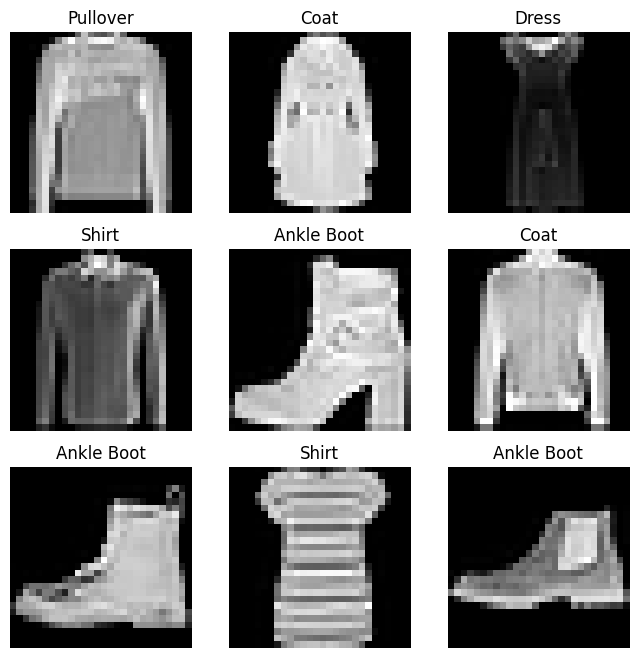

In [28]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_imgs), size=(1,)).item()
    img = train_imgs[sample_idx]
    label = labels[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Another option to load the dataset is via this function from https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py:

In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

### Create Torch Dataset class

``torch.utils.data.Dataset`` is an abstract class representing a dataset.

Your custom dataset should inherit ``Dataset`` and override the following methods:
 -  ``__len__`` so that ``len(dataset)`` returns the size of the dataset.
 -  ``__getitem__`` to support the indexing such that ``dataset[i]`` can be used to get :math:`i`\ th sample. This is memory efficient because all the images are not stored in the memory at once but read as required.

In [84]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

class CustomImageDataset(Dataset):
    def __init__(self, labels, train_imgs, transform=None, target_transform=None):
        self.labels = labels #pd.read_csv(annotations_file)
        self.train_imgs = train_imgs
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.train_imgs)

    def __getitem__(self, idx):
        image = self.train_imgs[idx]
        #image = image[np.newaxis, ...] #add one dimension at the begining
        label = self.labels[idx]
        label = label.astype(np.int64)
        if self.transform:
            image = self.transform(image)
            #print(image.shape)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

In [85]:
custom_dataset = CustomImageDataset(labels, train_imgs, transform=ToTensor())

In [86]:
file = 't10k-labels-idx1-ubyte'
test_labels = idx2numpy.convert_from_file(file)
file = 't10k-images-idx3-ubyte'
test_images = idx2numpy.convert_from_file(file)
test_data = CustomImageDataset(test_labels, test_images, transform=ToTensor())

In [87]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(custom_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [88]:
test_features, test_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


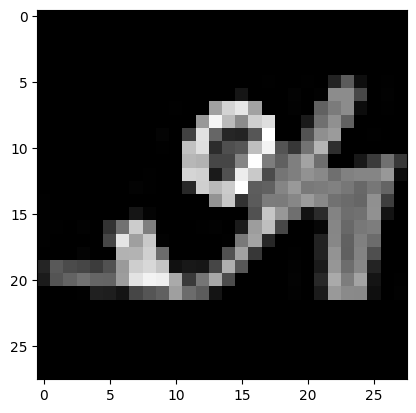

Label: 5


In [89]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [90]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Type of X [N, C, H, W]: {X.dtype}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Type of X [N, C, H, W]: torch.float32
Shape of y: torch.Size([64]) torch.int64


In [91]:
import time
start = time.time()
for X, y in train_dataloader:
    continue
'%.2f sec' % (time.time() - start)

'1.87 sec'

### Create Neural Network

In [92]:
from torch import nn

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [93]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [94]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    print("Dataset size:", size)
    num_batches = len(dataloader)
    print("Num batches:", num_batches)
    model.train()
    running_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    running_loss = running_loss / num_batches #average loss for each batch
    return running_loss

In [95]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct

In [96]:
epochs = 5
train_losses, test_losses = [], []
corrects = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    running_loss = train(train_dataloader, model, loss_fn, optimizer)
    train_losses.append(running_loss)
    test_loss, correct = test(test_dataloader, model, loss_fn)
    test_losses.append(test_loss)
    corrects.append(correct)
    print("Epoch: {}/{}.. ".format(t+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(correct))
print("Done!")

Epoch 1
-------------------------------
Dataset size: 60000
Num batches: 938
loss: 2.305256  [   64/60000]
loss: 2.280814  [ 6464/60000]
loss: 2.266370  [12864/60000]
loss: 2.257602  [19264/60000]
loss: 2.242462  [25664/60000]
loss: 2.221343  [32064/60000]
loss: 2.215541  [38464/60000]
loss: 2.203532  [44864/60000]
loss: 2.171821  [51264/60000]
loss: 2.165261  [57664/60000]
Test Error: 
 Accuracy: 48.4%, Avg loss: 2.140235 

Epoch: 1/5..  Training Loss: 2.227..  Test Loss: 2.140..  Test Accuracy: 0.484
Epoch 2
-------------------------------
Dataset size: 60000
Num batches: 938
loss: 2.142647  [   64/60000]
loss: 2.120055  [ 6464/60000]
loss: 2.103783  [12864/60000]
loss: 2.058191  [19264/60000]
loss: 2.006170  [25664/60000]
loss: 2.020446  [32064/60000]
loss: 1.980062  [38464/60000]
loss: 1.895831  [44864/60000]
loss: 1.875453  [51264/60000]
loss: 1.831448  [57664/60000]
Test Error: 
 Accuracy: 59.4%, Avg loss: 1.842049 

Epoch: 2/5..  Training Loss: 2.005..  Test Loss: 1.842..  Test 

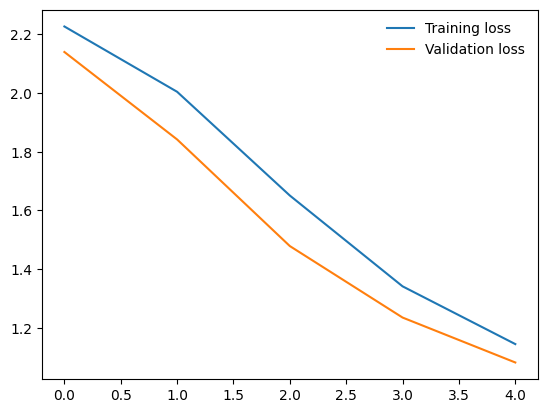

In [97]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)